In [46]:
import os 
import random
from ultralytics import YOLO
from PIL import Image
import numpy as np
from rembg import remove
from inference.InferenceModel import InferenceModel
import matplotlib.pyplot as plt


In [2]:
from yolo.YoloInferenceModel import YoloInferenceModel
from ocr.OcrInferenceModel import OcrInferenceModel

Yolo import time: 0.00 seconds
Ocr import time: 0.01 seconds


##### Directory

In [35]:
TRAINED_MODEL_DIR = './trained_models'

YOLO_MODEL_DIR = os.path.join(TRAINED_MODEL_DIR, 'YOLO')
YOLO_BEST_MODEL = os.path.join('model_train_renfred_13', 'weights', 'best.pt')
YOLO_MODEL_PATH = os.path.join(YOLO_MODEL_DIR, YOLO_BEST_MODEL)

OCR_MODEL_DIR = os.path.join(TRAINED_MODEL_DIR, 'OCR')
OCR_BEST_MODEL = os.path.join('CRNN_Model_AgusV3', 'model', 'CRNN_Model_AgusV3.keras')
OCR_BEST_WEIGHTS = os.path.join(OCR_MODEL_DIR, 'CRNN_Model_augmented', 'weight', 'best_weight.keras')
OCR_MODEL_PATH = os.path.join(OCR_MODEL_DIR, OCR_BEST_MODEL)

SAMPLE_IMAGE_PATH = os.path.join('./sample_image')

#### Yolo Model Test

In [44]:
yolo_model = YOLO(YOLO_MODEL_PATH)

print(os.listdir(SAMPLE_IMAGE_PATH))
image_files = [file for file in os.listdir(SAMPLE_IMAGE_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
test_image_path = os.path.join(SAMPLE_IMAGE_PATH, random_image)
pil_image = Image.open(test_image_path)
# bg_removed_img = remove(pil_image)
numpy_image = np.array(pil_image)

yolo_result = yolo_model(test_image_path, conf=0.5)[0]


['053_jpg.rf.62acce0ed90db5150d7fef758a1404ba.jpg', '079_jpg.rf.3348182aab7bd9b5782f73a74e4f229b.jpg', '1.jpg', '1000-receipt_jpg.rf.c2d505c820e7bad3137980e06c54420c.jpg', '1005-receipt_jpg.rf.2494c40128d1c5fd980084325bc755e9.jpg', '1027-receipt_jpg.rf.e62c3ff40d16a6b451068a6c6ec24ae9.jpg', '1031-receipt_jpg.rf.0ae712fdf19f808e1e4f7b27cf59c70c.jpg', '1049-receipt_jpg.rf.0366322176b870dc6bb28d7c0e01500a.jpg', '1052-receipt_jpg.rf.cc12e2d99f8fb0435df14d00906c4afe.jpg', '1060-receipt_jpg.rf.7d3f7289a523105f14bbba718f9a5844.jpg', '1084-receipt_jpg.rf.9e0a62b408e10574a684092bf4bdb35e.jpg', '1091-receipt_jpg.rf.9a28bec84a330fcee6484902c19aef96.jpg', '1129-receipt_jpg.rf.2649f5cb1e696a9e61fffe7750e68f34.jpg', '1135-receipt_jpg.rf.6a50b804eb25555ea50b8c5e46b44eba.jpg', '1136-receipt_jpg.rf.433606e469cc41bf74582ea00c49a3b7.jpg', '1149-receipt_jpg.rf.19eadca37e7c8d978d569010693d0082.jpg', '1168-receipt_jpg.rf.904ab0475586d50b8909518df377b754.jpg', '181_jpg.rf.ca1a11005d1b06016977ded96c0128f9.jpg

#### Removed Backgound


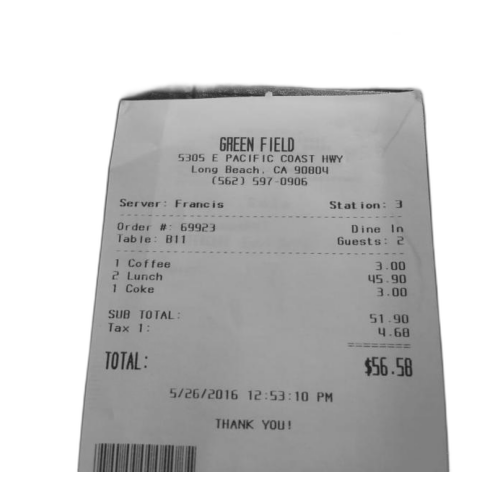

In [47]:
bg_removed = remove(pil_image)
plt.figure(figsize=(6, 6))
plt.imshow(bg_removed)
plt.axis('off')  # Hide the axes
plt.show()

In [40]:
yolo_result.show()

In [48]:
inference_model = InferenceModel(YOLO_MODEL_PATH, OCR_BEST_WEIGHTS, 0.3)
result = inference_model.predict(test_image_path)


0: 640x640 1 date_time, 3 items, 1 receipt, 1 shop, 1 total, 1163.7ms
Speed: 3.3ms preprocess, 1163.7ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━

#### Final result

In [49]:
print(result)

{
    "item": [
        "F BANE",
        "EANOR",
        "FOOTREE - 10"
    ],
    "total": "",
    "shop": "UHLENL T ILLD",
    "date_time": ""
}


Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction input shape: (1, 64, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


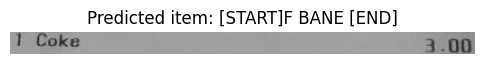

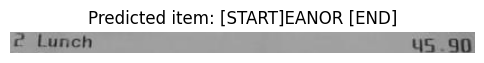

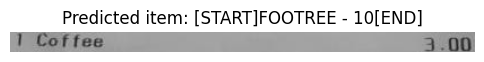

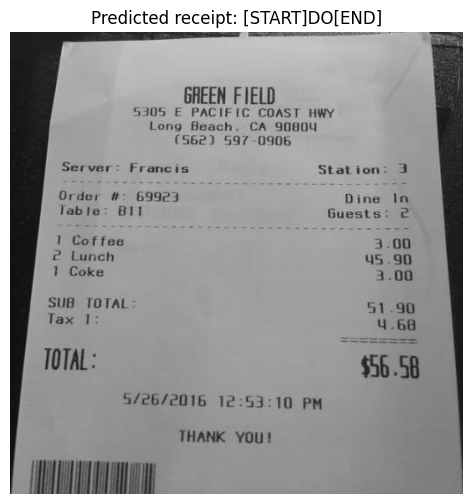

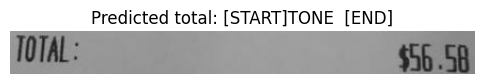

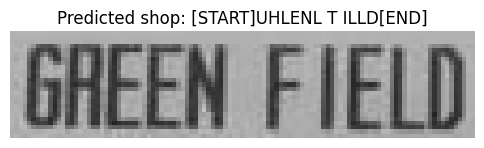

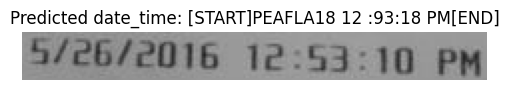

In [50]:
inference_model.visualize_results()